In [1]:
# Implement a linear regression model to predict the prices of houses based on their square footage and the number of 
# bedrooms and bathrooms.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Step 1: Data Collection
data = pd.read_csv('train.csv')

In [4]:
# Step 2: Data Preparation
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
# Check for missing values
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [6]:
# Handle missing values 
data = data.dropna(axis=1)

In [7]:
# Select features
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
X = data[features]
y = data['SalePrice']

In [8]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 3: Choosing a Model
model = LinearRegression()

In [13]:
# Step 4: Training the Model
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Step 5: Evaluating the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2806426667.247852


In [19]:
# Step 6: Making Predictions
new_data = pd.DataFrame({'GrLivArea': [2000], 'BedroomAbvGr': [3], 'FullBath': [2]})
prediction = model.predict(new_data)
print(f'Predicted Price: {prediction[0]}')

Predicted Price: 240377.51479736285


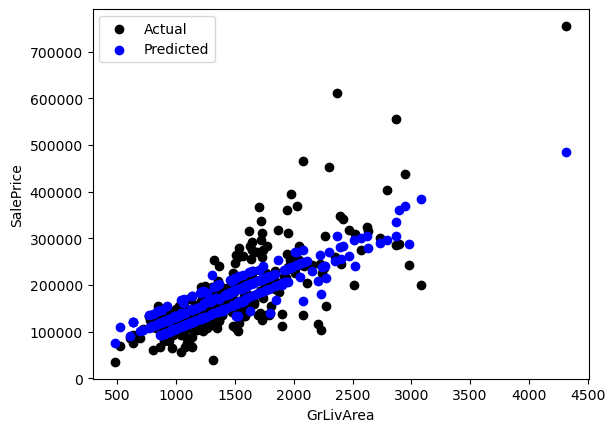

In [18]:
plt.scatter(X_test['GrLivArea'], y_test, color='black', label='Actual')
plt.scatter(X_test['GrLivArea'], y_pred, color='blue', label='Predicted')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()